# Chapter 4. Under the Hood: Training a Digit Classifier

- Arrays and Tensors
- Broadcasting
- SGD (Stochastic Gradient Descent)
- Loss Function
- Mini-Batches
- Neural Network Math

# Getting to know the MNIST digits data set

In [11]:
from fastai.vision.all import *
path = untar_data(URLs.MNIST)

In [13]:
(path/'training/0').ls()

(#5923) [Path('/home/john/.fastai/data/mnist_png/training/0/28771.png'),Path('/home/john/.fastai/data/mnist_png/training/0/6883.png'),Path('/home/john/.fastai/data/mnist_png/training/0/36090.png'),Path('/home/john/.fastai/data/mnist_png/training/0/27567.png'),Path('/home/john/.fastai/data/mnist_png/training/0/57629.png'),Path('/home/john/.fastai/data/mnist_png/training/0/48542.png'),Path('/home/john/.fastai/data/mnist_png/training/0/42180.png'),Path('/home/john/.fastai/data/mnist_png/training/0/27200.png'),Path('/home/john/.fastai/data/mnist_png/training/0/33492.png'),Path('/home/john/.fastai/data/mnist_png/training/0/10750.png')...]

In [16]:
Image.open(path/'training/0/6883.png')

In [17]:
image = Image.open(path/'training/0/6883.png')

In [18]:
image

In [20]:
image_tensor = tensor(image)

In [21]:
path = untar_data(URLs.MNIST_SAMPLE)

In [22]:
path.ls()

(#3) [Path('/home/john/.fastai/data/mnist_sample/valid'),Path('/home/john/.fastai/data/mnist_sample/labels.csv'),Path('/home/john/.fastai/data/mnist_sample/train')]

In [23]:
(path/'train').ls()

(#2) [Path('/home/john/.fastai/data/mnist_sample/train/7'),Path('/home/john/.fastai/data/mnist_sample/train/3')]

In [24]:
(path/'train').ls()

(#2) [Path('/home/john/.fastai/data/mnist_sample/train/7'),Path('/home/john/.fastai/data/mnist_sample/train/3')]

In [30]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
threes

(#6131) [Path('/home/john/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10091.png')...]

In [43]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [44]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [160]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
len(colors)

170

In [80]:
df = pd.DataFrame(tensor(im3)[4:26, 4:22])
df.style.set_properties(**{'font-size':'10pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# A first attempt
For a first attempt at recognizing digits, we won't use a neural network. We'll see how similar each pixel of a sample is to an "ideal 3" or an "ideal 7". We'll consider it a three if the sample is closer to this ideal 3.

In [81]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

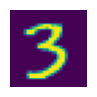

In [87]:
show_image(three_tensors[1])

In [88]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [100]:
print("A tensor's rank is its dimension:", stacked_threes.ndim, )
print("A tensor's rank is its dimension:", len(stacked_threes.shape) )

A tensor's rank is its dimension: 3
A tensor's rank is its dimension: 3


<Axes: >

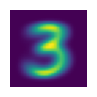

In [101]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

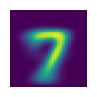

In [102]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

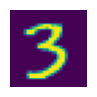

In [103]:
a_3 = stacked_threes[1]
show_image(a_3)

In [121]:
def l1(a,b):
    return (a-b).abs().mean()

def l2(a,b):
    return ((a-b)**2).mean().sqrt()

print("a_3 vs mean3:", l1(a_3, mean3), l2(a_3, mean3))
print("a_3 vs mean7:", l1(a_3, mean7), l2(a_3, mean7))

a_3 vs mean3: tensor(0.1114) tensor(0.2021)
a_3 vs mean7: tensor(0.1586) tensor(0.3021)


We don't have to define these norms. They're included in PyTorch under `torch.nn.functional`. `fastai` imports this module as `F`:

In [124]:
print("a_3 vs mean3:", F.l1_loss(a_3.float(), mean3),  F.mse_loss(a_3, mean3).sqrt())
print("a_3 vs mean7:", F.l1_loss(a_3.float(), mean7),  F.mse_loss(a_3, mean7).sqrt())

a_3 vs mean3: tensor(0.1114) tensor(0.2021)
a_3 vs mean7: tensor(0.1586) tensor(0.3021)


We use PyTorch tensors instead of NumPy arrays because NumPy doesn't support GPU operations (but PyTorch does).

In [129]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls() if '.ipynb_checkpoints' not in o.name]).float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls() if '.ipynb_checkpoints' not in o.name]).float()/255

In [131]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [153]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-2,-1))

In [149]:
print(mnist_distance(valid_3_tens, mean3), mnist_distance(valid_3_tens, mean3).shape)

tensor([0.1068, 0.1330, 0.1115,  ..., 0.1143, 0.1238, 0.1095]) torch.Size([1010])


In [154]:
def is_3(t):
    return mnist_distance(t, mean3) < mnist_distance(t, mean7)

In [155]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [156]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [158]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## First attempt summary
We get >90% accuracy using this method, but want to do better. The digits 3 and 7 look pretty different: Surely we can do better. 

We don't have a way to improve this model, so we need to find another approach.

# Attempt 2: SGD (Stochastic Gradient Descent)